<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>Networkx version:</b>  2.x<br/>
<b>Last update:</b> 18/03/2020
</span>

<a id='top'></a>
# *Intro to Networkx*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
g = nx.read_edgelist("data/network.csv", delimiter=",", nodetype=int)

## Centrality measures
Node centrality measures can be easily computed as follows

In [4]:
g.degree(nbunch=[0,1,2]) # compute the degree of a set of nodes (if specified).

DegreeView({0: 5, 1: 24, 2: 55})

In [5]:
nx.closeness_centrality(g)[0] # compute the closeness centraliry of all nodes (and access the value of node 0)

0.2262227055542501

In [6]:
nx.betweenness_centrality(g)[0] # compute the betweenness centraliry of all nodes (and access the value of node 0)

3.104347235549552e-05

In [7]:
nx.harmonic_centrality(g)[0]

652.6834776334922

In [8]:
nx.pagerank(g)[0]

0.0002170705922274007

In [9]:
nx.eigenvector_centrality(g)[0]

0.006863665432818066

## Assortative Mixing

In [11]:
nx.degree_assortativity_coefficient(g)

0.08437905401841837

In [12]:
nx.degree_pearson_correlation_coefficient(g)

0.08437905401841858

In [14]:
degrees = dict(nx.degree(g))

In [21]:
x, y = [], []

for n, d in degrees.items():
    avg_deg = 0
    for nn in nx.neighbors(g, n):
        avg_deg += degrees[nn]
    avg_deg /= len(list(nx.neighbors(g, n)))
    x.append(d)
    y.append(avg_deg)

Text(0, 0.5, 'knn')

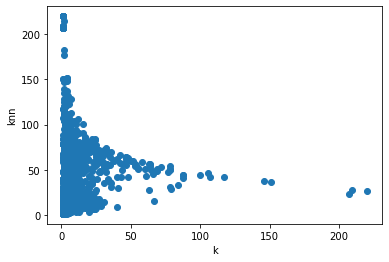

In [26]:
plt.scatter(x, y)
plt.xlabel('k')
plt.ylabel('knn')